In [6]:
import matplotlib.pyplot as plt #para graficar informacion
import pandas as pd #para manejo de datos
import os #para rutas 
import threading #para ejecutar por segundo
from itertools import zip_longest #para crear df teniendo listas vacias

In [40]:
class MRUV:
    #constructor
    def __init__(self,name,posicion_final=0,acceleration=0,velocidad_inicial=0,velocidad_final=0,tiempo=0):
      
      #validamos si exite un objeto con el nombre que ingrese el usuario
      os.chdir(r'D:/JUAN/PROYECTO_CAF_CLON/PROYECTO_MRUV_CAF_PY/Archivos_Mru')
      archivos=os.listdir()
      n=[archivo.replace('.xlsx','') for archivo in archivos if archivo.endswith('.xlsx')]
      
      if name in n:
          print(f"El nombre :{name} ya existe elija otro nombre")
          return#raise NombreExistenteError(f"El nombre {name} ya existe,elija otro nombre")
      else:
        self.velocidad_inicial=velocidad_inicial
        self.tiempo=tiempo
        self.acceleration=acceleration
        self.velocidad_final=velocidad_final
        self.posicion_incial=0
        self.posicion_final=posicion_final
        self.list_tiempo=[]
        self.list_acceleration=[]
        self.list_posicion=[]
        self.list_velocidad=[]
        self.df_datos=pd.DataFrame()
        self.name=name
        self.archivo=name+'.xlsx'

    #creamos las funciones para el objeto como acelerar y desacelerar que afectan a la velocidad

    def acelerar(self,acelerar):
      self.acceleration=float(self.acceleration)+float(acelerar) #acelerara el vehiculo


    def agregar_distancia(self,distancia):
      self.posicion_final=distancia #cambiaremos la distancia final


#'''CREANDO FORMULAS DE MRUV PARA PODER CALCULAR LOS DATOS QUE VA CORRIENDO EL VEHICULO'''
    def frm_acceleration(self):
      #Esta funcion va calcular la aceleracion que tendra el vehiculo
      #a = (v - v₀) / t  --Formula que nos indican
      if self.tiempo!=0:
        self.acceleration=((self.velocidad_final-self.velocidad_inicial)/self.tiempo)
      if self.tiempo==0:
        #si no hay tiempo lo calculamos diferente
        self.acceleration=((self.velocidad_final**2)-(self.velocidad_inicial**2))/(2*(self.posicion_final))# - self.posicion_incial))
      return self.acceleration


    def frm_velocidad_final(self):
      #Esta funcion calculara la velocidad final
      #v = v₀ + at
      if self.tiempo!=0:
        self.velocidad_final=(self.velocidad_inicial+(self.acceleration*self.tiempo))
      if self.tiempo==0:
        self.velocidad_cuadrado=(self.velocidad_inicial**2) + (2 * self.acceleration * (self.posicion_final - self.posicion_incial))
        self.velocidad_final = self.velocidad_cuadrado**(1/2)   
      return self.velocidad_final
      


    def frm_posicion(self):
      #Esta funcion va calcular posicion
      #x = x₀ + v₀t + (1/2)at²
      self.posicion=self.posicion_incial+(self.velocidad_inicial*self.tiempo)+((1/2) * (self.acceleration) * (self.tiempo ** 2))

      return self.posicion
    

    def frm_tiempo(self):
      #va calcular el tiempo recorrido con la velocidad
      #t = (v - v₀) / a
      self.tiempo=(self.velocidad_final-self.velocidad_inicial)/self.acceleration
      return self.tiempo




    #otras funciones que se usara o no
    def funcion_print_por_segundo(self):   
      for i in range(self.tiempo):
          t = threading.Timer(1.0*i)
          t.start()

    def print(self):
      print('velocidad_inicial:',self.velocidad_inicial)
      print('tiempo:',self.tiempo)
      print('acceleration:',self.acceleration)
      print('velocidad_final:',self.velocidad_final)
      print('posicion_incial:',self.posicion_incial)
      print('posicion_final:',self.posicion_final)

#'''GUARDAMOS LA INFORMACION PARA LUEGO PODER UTILIZARLOS EN DATOS Y OTROS GRAFICOS'''

    #guardamos la info para no perderla
    
    def unir_datos(self):
      # archivo=self.name+'.xlsx'
      # #busco primero si existe el archivo para solo agregar la info
      # df_archivo=pd.read_excel(archivo)
      # print(df_archivo)
      #usamos un dataframe para crear una tabla , como sip_longest evitamos un error que pueda truncarnos el proceso
      self.df_datos = pd.DataFrame(list(zip_longest(self.list_tiempo, self.list_posicion, self.list_acceleration,self.list_velocidad)), columns=['Tiempo', 'distancia', 'acceleration','velocidad'])
      self.df_datos['objeto']=self.name
      self.df_datos['objetodistancia']=''

      return self.df_datos


    def info_archivo(self):      
      os.chdir(r'D:/JUAN/PROYECTO_CAF_CLON/PROYECTO_MRUV_CAF_PY/Archivos_Mru')
      #buscamos si el archivo existe, para agregar info o crear
      if os.path.exists(self.archivo):
          df_existe=pd.read_excel(self.archivo)
          df=pd.concat([df_existe,self.df_datos],axis=0)
          # Eliminar los duplicados basándose en todas las columnas
          self.df_datos=df.drop_duplicates(subset=["Tiempo"])
          self.df_datos.to_excel(self.archivo,sheet_name="Hoja 1",index=False)
          # print("El archivo existe")
      else:
        self.df_datos.to_excel(self.archivo,sheet_name="Hoja 1",index=False)
        print(self.df_datos)

      return self.archivo
    
    def listar_tiempo(self):
      #tiempo calcular para graficar
      tiempo=self.tiempo
      self.list_tiempo=[]
      for i in range(1, int(tiempo) + 1):
        self.list_tiempo.append(i)

      return self.list_tiempo
    

    def guardar_datos_distancia(self):
      
      if self.posicion_final!=0:
        posicion_inicial=float(self.posicion_incial)
        velocidad_inicial=float(self.velocidad_inicial)
        acceleration=float(self.acceleration)

        #tiempo calcular para graficar
        self.list_posicion=[]
        for second in self.list_tiempo:
          calculo=posicion_inicial+(velocidad_inicial*second)+((1/2) * (acceleration) * (second ** 2))
          self.list_posicion.append(calculo)
        
        #v = v₀ + at
        print(self.list_tiempo)
        print(self.list_posicion)
      else:
        self.list_posicion=[]
        
      return self.list_posicion
  

    def guardar_datos_aceleracion(self):

      velocidad_final=float(self.velocidad_final)
      velocidad_inicial=float(self.velocidad_inicial)

      #a = (v - v₀) / t  --Formula que nos indican
      if self.tiempo!=0:

        self.list_acceleration=[]
        for second in self.list_tiempo:
          calculo=self.acceleration
          # calculo=(velocidad_final-velocidad_inicial)/second
          self.list_acceleration.append(calculo)
      
      else:
        self.list_acceleration=[]
      #v = v₀ + at
      print(self.list_acceleration)
      
      return self.list_acceleration


    def guardar_datos_velocidad(self):

      velocidad_inicial=self.velocidad_inicial 
      
      #tiempo calcular para graficar
      self.list_velocidad=[]
      for second in self.list_tiempo:
        print(self.list_acceleration)
        calculo=(velocidad_inicial+((self.list_acceleration[second-1]*second)))
        print(velocidad_inicial)
        print(self.list_acceleration[second-1])
        
        print(calculo)
        self.list_velocidad.append(calculo)
      
      #v = v₀ + at
      print(self.list_velocidad)
      
      return self.list_velocidad
    

    def actualizar_variables(self):
      self.velocidad_inicial=self.velocidad_final
      self.posicion_incial=self.posicion_final
      self.tiempo=0


#''''GRAFICAMOS LA INFO QUE TENEMOS ''''

    #ejecutamos una funcion para poder graficar lo que se tiene
    def graficar_velocidad(self):
      plt.figure(figsize=(15,10))#para el tamaño
      plt.plot(self.list_tiempo,self.list_velocidad,marker='o',linestyle='--',color='g')
      plt.xticks(self.list_tiempo)
      plt.yticks(self.list_velocidad)
      plt.xlabel('Tiempo')#para dar nombre al grafico
      plt.ylabel('Velocidad')#para dar nombre al grafico


    def graficar_distancia(self):
      plt.figure(figsize=(15,10))#para el tamaño
      plt.plot(self.list_tiempo,self.list_posicion,marker='o',linestyle='--',color='g')
      plt.xticks(self.list_tiempo)
      plt.yticks(self.list_posicion)  
      plt.xlabel('Tiempo')#para dar nombre al grafico
      plt.ylabel('Posicion')#para dar nombre al grafico


    def graficar_aceleracion(self):
      plt.figure(figsize=(15,10))#para el tamaño
      plt.plot(self.list_tiempo,self.list_acceleration,marker='o',linestyle='--',color='g')
      plt.xticks(self.list_tiempo)
      plt.yticks(self.list_acceleration)  
      plt.xlabel('Tiempo')#para dar nombre al grafico
      plt.ylabel('Aceleracion')#para dar nombre al grafico
    
    def extraer_info_archivo(self):
      df=pd.read_excel(self.archivo)
      self.list_tiempo=df['Tiempo']
      self.list_posicion=df['distancia']
      self.list_acceleration=df['acceleration']
      self.list_velocidad=df['velocidad']


In [41]:
#problema
#Supongamos que un automóvil viaja a una velocidad de 30 m/s y frena bruscamente, 
#reduciendo su velocidad a 10 m/s en un tiempo de 4 segundos. Queremos determinar la aceleración negativa experimentada durante el frenado.

#os.remove('Carrito1.xlsx')
carrito1=MRUV(velocidad_inicial=50,velocidad_final=0,posicion_final=100,name='Carrito4')
aceleracion=carrito1.frm_acceleration()
tiempo=carrito1.frm_tiempo()
carrito1.print()
carrito1.listar_tiempo()
carrito1.guardar_datos_aceleracion()
velocidad=carrito1.guardar_datos_velocidad()
carrito1.guardar_datos_distancia()
# # carrito1.print()

# # carrito1.unir_datos()

velocidad_inicial: 50
tiempo: 4.0
acceleration: -12.5
velocidad_final: 0
posicion_incial: 0
posicion_final: 100
[-12.5, -12.5, -12.5, -12.5]
[-12.5, -12.5, -12.5, -12.5]
50
-12.5
37.5
[-12.5, -12.5, -12.5, -12.5]
50
-12.5
25.0
[-12.5, -12.5, -12.5, -12.5]
50
-12.5
12.5
[-12.5, -12.5, -12.5, -12.5]
50
-12.5
0.0
[37.5, 25.0, 12.5, 0.0]
[1, 2, 3, 4]
[43.75, 75.0, 93.75, 100.0]


[43.75, 75.0, 93.75, 100.0]

In [43]:
print(aceleracion)
print(tiempo)
print(velocidad)



-12.5
4.0
[37.5, 25.0, 12.5, 0.0]


velocidad_inicial: 10
tiempo: 20.0
acceleration: -0.5
velocidad_final: 0
posicion_incial: 0
posicion_final: 100
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[9.75, 19.0, 27.75, 36.0, 43.75, 51.0, 57.75, 64.0, 69.75, 75.0, 79.75, 84.0, 87.75, 91.0, 93.75, 96.0, 97.75, 99.0, 99.75, 100.0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[-10.0, -5.0, -3.3333333333333335, -2.5, -2.0, -1.6666666666666667, -1.4285714285714286, -1.25, -1.1111111111111112, -1.0, -0.9090909090909091, -0.8333333333333334, -0.7692307692307693, -0.7142857142857143, -0.6666666666666666, -0.625, -0.5882352941176471, -0.5555555555555556, -0.5263157894736842, -0.5]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.0, 5.0, 6.666666666666666, 7.5, 8.0, 8.333333333333334, 8.571428571428571, 8.75, 8.88888888888889, 9.0, 9.090909090909092, 9.166666666666666, 9.23076923076923, 9.285714285714286, 9.333333333333334, 9.375, 9.411764705882353, 9.4444444

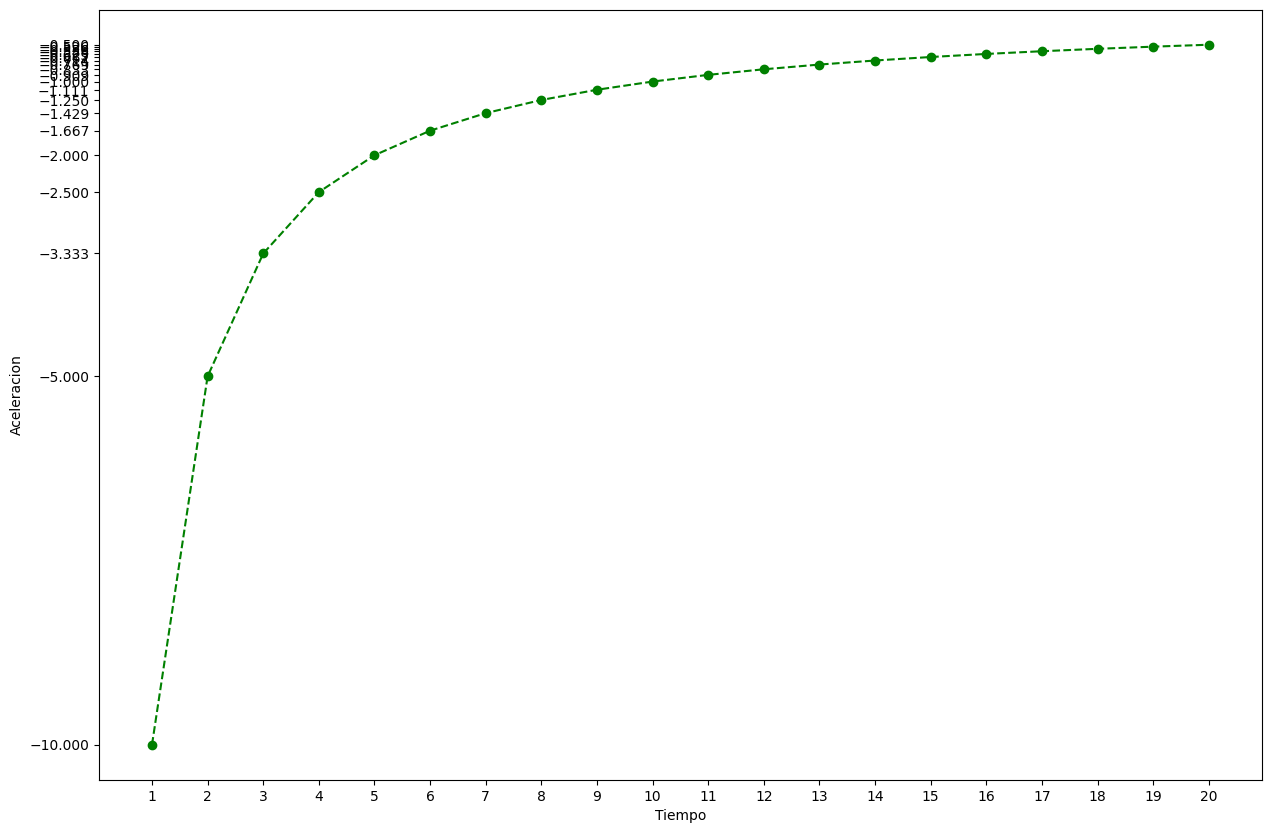

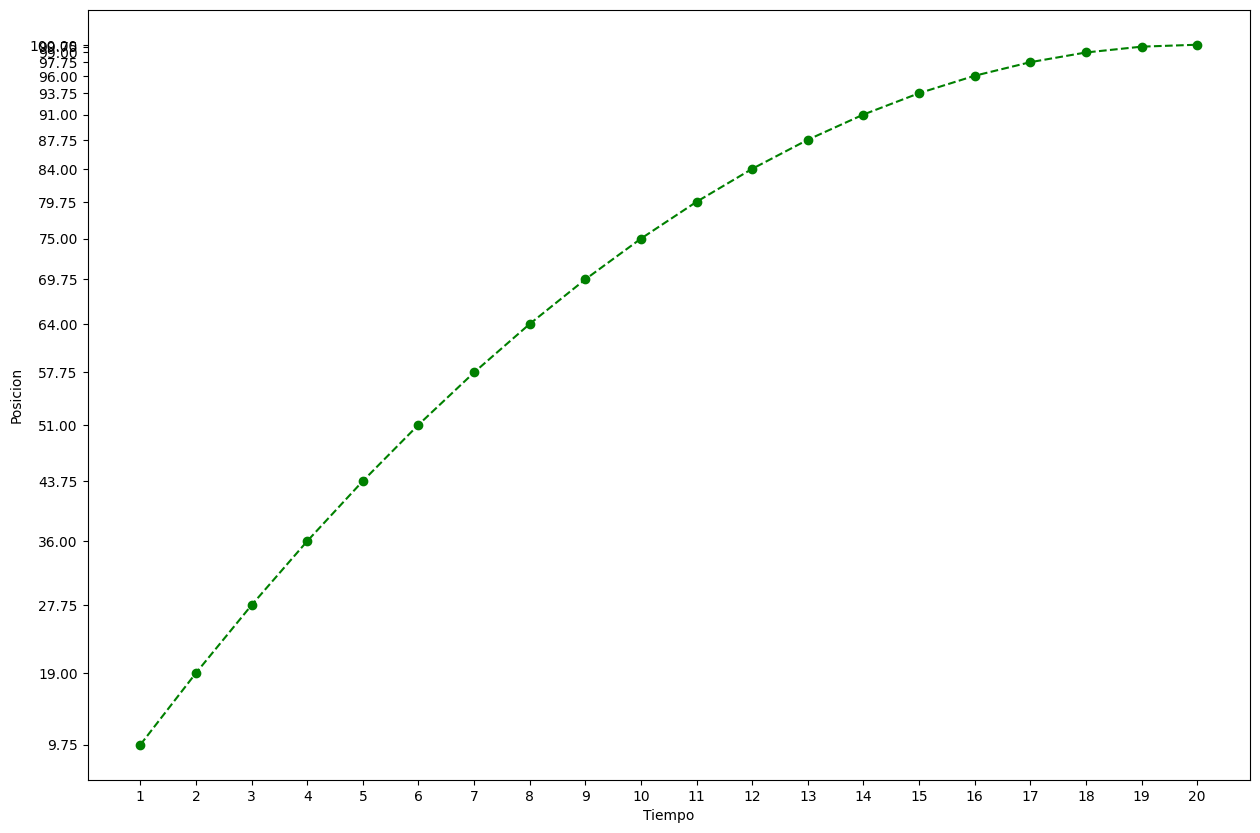

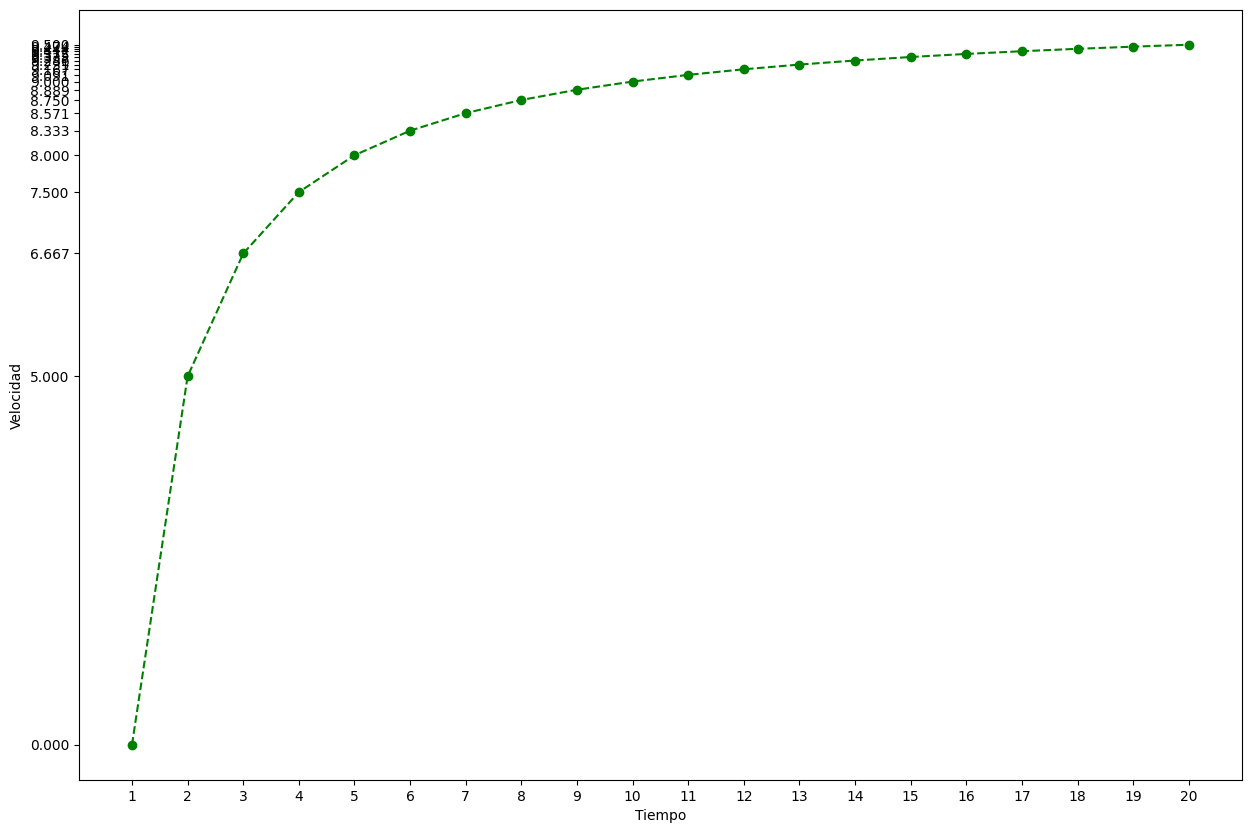

In [131]:
# Supongamos que un objeto se mueve con una velocidad inicial de 10 m/s y se
# detiene después de recorrer una distancia de 100 metros. Queremos calcular el tiempo que tarda en detenerse.
carrito2=MRUV(name="Carrito2",velocidad_inicial=10,velocidad_final=0,posicion_final=100)
carrito2.frm_aceleracion_distancia()
carrito2.frm_tiempo()
carrito2.print()
carrito2.listar_tiempo()
carrito2.guardar_datos_distancia()
d=carrito2.guardar_datos_aceleracion()
carrito2.guardar_datos_velocidad()
carrito2.graficar_aceleracion()
carrito2.graficar_distancia()
carrito2.graficar_velocidad()
carrito2.print()

[-10.0,
 -5.0,
 -3.3333333333333335,
 -2.5,
 -2.0,
 -1.6666666666666667,
 -1.4285714285714286,
 -1.25,
 -1.1111111111111112,
 -1.0,
 -0.9090909090909091,
 -0.8333333333333334,
 -0.7692307692307693,
 -0.7142857142857143,
 -0.6666666666666666,
 -0.625,
 -0.5882352941176471,
 -0.5555555555555556,
 -0.5263157894736842,
 -0.5]